# Análise dataset Mental Health in Tech Survey

## Link dataset: https://www.kaggle.com/osmi/mental-health-in-tech-survey

Descrição: Este conjunto de dados é de uma pesquisa de 2014 que mede as atitudes em relação à saúde mental e a frequência de transtornos de saúde mental no local de trabalho de tecnologia.

Esse dataset contém os seguintes atributos:

<b>Timestamp</b><br>
<b>Age</b><br>
<b>Gender</b><br>
<b>Country</b><br>
<b>state</b>: If you live in the United States, which state or territory do you live in?<br>
<b>self_employed</b>: Are you self-employed?<br>
<b>family_history</b>: Do you have a family history of mental illness?<br>
<b>treatment</b>: Have you sought treatment for a mental health condition?<br>
<b>work_interfere</b>: If you have a mental health condition, do you feel that it interferes with your work?<br>
<b>no_employees</b>: How many employees does your company or organization have?<br>
<b>remote_work</b>: Do you work remotely (outside of an office) at least 50% of the time?<br>
<b>tech_company</b>: Is your employer primarily a tech company/organization?<br>
<b>benefits</b>: Does your employer provide mental health benefits?<br>
<b>care_options</b>: Do you know the options for mental health care your employer provides?<br>
<b>wellness_program</b>: Has your employer ever discussed mental health as part of an employee wellness program?<br>
<b>seek_help</b>: Does your employer provide resources to learn more about mental health issues and how to seek help?<br>
<b>anonymity</b>: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?<br>
<b>leave</b>: How easy is it for you to take medical leave for a mental health condition?<br>
<b>mentalhealthconsequence</b>: Do you think that discussing a mental health issue with your employer would have negative consequences?<br>
<b>physhealthconsequence</b>: Do you think that discussing a physical health issue with your employer would have negative consequences?<br>
<b>coworkers</b>: Would you be willing to discuss a mental health issue with your coworkers?<br>
<b>supervisor</b>: Would you be willing to discuss a mental health issue with your direct supervisor(s)?<br>
<b>mentalhealthinterview</b>: Would you bring up a mental health issue with a potential employer in an interview?<br>
<b>physhealthinterview</b>: Would you bring up a physical health issue with a potential employer in an interview?<br>
<b>mentalvsphysical</b>: Do you feel that your employer takes mental health as seriously as physical health?<br>
<b>obs_consequence</b>: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?<br>
<b>comments</b>: Any additional notes or comments<br>


## Objetivos da análise:

### 1- Verificar a mudança de comportamento de cuidados com a saúde mental em relação a cada localidate
### 2- Quais são as caracteristicas que mais influenciam a saúde mental


# Setup

In [ ]:
pip install pandas-profiling

# Imports

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

#sns.set_context("paper", rc={"font.size":10,"axes.titlesize":15,"axes.labelsize":15}) 

# Pré-processamento

In [38]:
df = pd.read_csv("survey.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [39]:
# Pre-análise dos atributos

from pandas_profiling import ProfileReport

ProfileReport(df,  minimal=True, explorative=True)

## Conclusões da pre-análise 
### Análise dos atributos

<b>Country:</b> Os países com mais representantes o dataset são: EUA (59%), Reino Unido (14%), Canadá (5%) e Alemanha (3%).<br>
<b>self_employed:</b> A maioria dos empregados (86%) trabalham para algum empregador, ou seja, não são trabalhadores por conta própria.<br>
<b>treatment:</b> Cerca de 50% dos empregados entrevistados já procuraram tratamento para problemas de saúde mental.<br>
<b>work_interfere:</b> Cerca de 62% dos entrevistados sentem que a condição da sua saúde mental influencia o seu trabalho.<br>
<b>tech_company:</b> 81% dos entrevistados trabalham em empresas de tecnologia <br>
<b>mental_health_interview:</b> Cerca de 80% dos entrevistados não falariam sobre algum problema de saúde mental em uma entrevista de emprego <br>
<b>obs_consequence:</b> 81% dos entrevistados dizem não terem observado consequências negativas para outros funcionarios com problemas de saúde mental

### Pela análise podemos concluir que os seguintes atributs apresentam problemas:

<b>Age:</b> Mesmo não contentendo nenhum valor faltando, existem diversas inconsistências com esse atributo como por exemplo idades negativas ou muito acima de valores aceitáveis.<br>
<b>Gender:</b> Esse atributo possui muitas inconsistências com relação aos padrões dos valores por exemplo para representar o gênero masculino existem pelo menos 4 formas diferentes: Male, male, M, m.<br>
<b>State:</b> Essa atributo possui uma boa quantidade de NaN, mas isso foi devido a decisão dos criadores do dataset de colocar a sigla do estado da pessoa apenas se ela morasse nos EUA.<br>
<b>self_employed:</b> Contém 18 (1.4%) de NaN.<br>
<b>work_interfere:</b> Contém 256 (21%) de NaN. Pré-processamento: Talvez seja melhor converter este atributo para númerico com valor de 0 a 3 representando cada uma das veriações do atributos (Never, Rarely, Sometimes e Often) <br>
<b>no_employees:</b> Este atributo também pode ser convertido para valor númerico onde cada uma das faixas de empregados representa um número. Pode existir problemas de interpretação caso seja escolhidos números sequênciais, nesse caso é melhor lever em consideração a discrepância entre as faixas de empregados, por exemplo apesar de faixas 1-5 e 6-25 serem próximas não se pode atribuir um valor de 0 e outro de 1 para as mesmas, já que a segunda varia 5x mais. <br>
<b>leave:</b> Pré-processamento: Talvez seja melhor converter este atributo para númerico com valor de 0 a 3 representando cada uma das veriações do atributos (Very easy, Somewhat easy, Somewhat difficult e Very difficult) <br>
<b>mental_health_consequence:</b> Pré-processamento: Talvez seja melhor converter este atributo para númerico com valor de 0 a 2 representando cada uma das veriações do atributos (No, Maybe, Yes) <br>
<b>phys_health_consequence:</b> Pré-processamento: Talvez seja melhor converter este atributo para númerico com valor de 0 a 2 representando cada uma das veriações do atributos (No, Maybe, Yes) <br>

## Pré-processamento atributos

### Age

Idades acima de 75 anos e abaixo de 16 vão ser consideradas erros. Como não existe nenhuma outra forma de determinar a idade esses valores vão ser substituidos por NaN.

In [129]:
df["Age"] = df["Age"].map(lambda age: age if 75>age>16 else np.nan)

In [28]:
df["Age"].describe()

count    1251.000000
mean       32.076739
std         7.288272
min        18.000000
25%        27.000000
50%        31.000000
75%        36.000000
max        72.000000
Name: Age, dtype: float64

### Gender

Para simplificar as analises os valores desse atributo vão ser divididos em 3 grupos: (male, fermale e outro)

In [36]:
male = ["Male", "m", "male", "maile", "M", "Man", "Mail", "Make", "Mal", "Male ", "Male (CIS)", "Malr", "Cis Male", "Cis Man"]
fermale = ["Cis Female", "F", "Femake", "Female", "Female ", "Female (cis)", "Woman", "cis-female/femme", "f", "femail", "female", "woman"]

def func(gender):
    if gender in male:
        return "male"
    elif gender in fermale:
        return "female"
    else:
        return "other"

    
df["Gender"] = df["Gender"].map(func)
df["Gender"].describe()

count     1259
unique       3
top       male
freq       988
Name: Gender, dtype: object

### work_interfere

Converter este atributo para númerico com valor de 0 a 3 representando cada uma das veriações do atributos (Never, Rarely, Sometimes e Often)

In [131]:
dict_ = {
    "Never": 0,
    "Rarely": 1,
    "Sometimes": 2,
    "Often": 3
}

df["work_interfere"] = df["work_interfere"].replace(dict_)
df["work_interfere"].describe()

count    995.000000
mean       1.542714
std        0.983227
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: work_interfere, dtype: float64

### no_employees

Criação de um novo atributo derivado tomando como valor o número minimo de empregados ou seja se a empresa possui de 1-5 empregados o valor minimo vai ser 1. 

In [132]:
dict_ = {
    "6-25": 6,
    "26-100": 26,
    "More than 1000": 1000,
    "100-500": 100,
     "1-5": 1,
     "500-1000": 500
}
df["min_employees"] = df["no_employees"].replace(dict_)
df["min_employees"].describe()

count    1259.000000
mean      269.274027
std       406.307349
min         1.000000
25%         6.000000
50%        26.000000
75%       500.000000
max      1000.000000
Name: min_employees, dtype: float64

### Converter atributos númericos

In [133]:
dict_ = {
    "benefits": {"Yes":1, "Don't know":0, "No": -1},
    "care_options": {"Yes":1, "Not sure":0, "No": -1},
    "wellness_program": {"Yes":1, "Don't know":0, "No": -1},
    "seek_help": {"Yes":1, "Don't know":0, "No": -1},
    "anonymity": {"Yes":1, "Don't know":0, "No": -1},
    "leave": {"Somewhat easy": 0.5, "Very easy": 1, "Somewhat difficult": -0.5, "Very difficult":-1, "Don't know": 0},
    "coworkers": {"Yes": 1, "Some of them": 0, "No": -1},
    "supervisor": {"Yes": 1, "Some of them": 0, "No": -1},
    "mental_health_interview": {"Yes": 1, "Maybe": 0, "No": -1},
    "mental_health_consequence": {"Yes": -1, "Maybe": 0, "No": 1},
    "obs_consequence": {"Yes": -1, "No": 1},
    "self_employed": {"Yes": 1, "No": 0},
    "family_history": {"Yes": 1, "No": 0},
    "treatment": {"Yes": 1, "No": 0},
    "remote_work": {"Yes": 1, "No": 0},
    "tech_company": {"Yes": 1, "No": 0},
}

for attr in dict_:
    df[f"{attr}_num"] = df[attr].replace(dict_[attr])

### phys_health_consequence

Converter este atributo para númerico com valor de 0 a 2 representando cada uma das veriações do atributos (No, Maybe, Yes)

## Criação de novos atributos

Para simplificar a interpretação podemos dividir os atributos em 3 conjuntos.<br>
<b>Os atributos de identificação</b> (Timestamp, Age, Gender, Country, state, self_employed, no_employees, remote_work, tech_company) que são relativos a identificação dos empregados e da sua situação.<br>
<b>Os atributos de opniões</b> (work_interfere, mentalhealthconsequence, physhealthconsequence, coworkers, supervisor, mentalhealthinterview, physhealthinterview, mentalvsphysical, obs_consequence) que remetem a opnião dos empregados sobre a saúde mental.<br> <b>E os atributos de condição</b> (family_history, treatment, benefits, care_options, wellness_program, seek_help, anonymity, leave) que representam as condições do empregado dentro do contexto de saúde mental.

Agora pode-se criar um ou mais atributo derivados de cada um desses grupos. 

### employer_mental_health_support

Se o ambiente de trabalho fornece auxilio em relação à saúde mental. <br>
Para criação desse atributo os seguintes outros atributos vão ser usados: benefits, care_options, wellness_program, seek_help, anonymity, leave. Caso o empregado não saiba se o empregador fornece ou não determinado servico sera considerado como ponto neutro, caso o empregador forneça o serviço é ponto positivo, caso contrário ponto negativo. No final vai ser tirada uma média de todos esses pontos e conforme maior for a pontuação melhor é a cobertura sobre saúde mental por parte do empregador. 

In [30]:
scores_dict = {
    "benefits": {"Yes":1, "Don't know":0, "No": -1},
    "care_options": {"Yes":1, "Not sure":0, "No": -1},
    "wellness_program": {"Yes":1, "Don't know":0, "No": -1},
    "seek_help": {"Yes":1, "Don't know":0, "No": -1},
    "anonymity": {"Yes":1, "Don't know":0, "No": -1},
    "leave": {"Somewhat easy": 0.5, "Very easy": 1, "Somewhat difficult": -0.5, "Very difficult":-1, "Don't know": 0}
}

def func(dict_attrs):
    sum_ = 0
    count = 0
    for attr, dict_ in scores_dict.items():
        if dict_attrs[attr] != np.nan:
            sum_ += dict_[dict_attrs[attr]]
            count += 1

    return sum_/count

df["employer_mental_health_support"] = df.apply(func, axis=1)
df["employer_mental_health_support"].describe()

count    1259.000000
mean       -0.062881
std         0.465579
min        -1.000000
25%        -0.416667
50%        -0.166667
75%         0.250000
max         1.000000
Name: employer_mental_health_support, dtype: float64

### discution_wilness_factor

O nivel de vontade do empregado de discutir sobre a saúde mental. <br>
Para a criação desse atributo vão ser usados os seguintes atributos: coworkers, supervisor, mentalhealthinterview. Caso o empregado esteja disposto a discutir será considerado um ponto positivo, caso contraário é ponto negativo e caso ele esteja indeciso o ponto é neutro. No final é feito a média de todos os pontos.

In [31]:
scores_dict = {
    "coworkers": {"Yes": 1, "Some of them": 0, "No": -1},
    "supervisor": {"Yes": 1, "Some of them": 0, "No": -1},
    "mental_health_interview": {"Yes": 1, "Maybe": 0, "No": -1},
}

def func(dict_attrs):
    sum_ = 0
    count = 0
    for attr, dict_ in scores_dict.items():
        if dict_attrs[attr] != np.nan:
            sum_ += dict_[dict_attrs[attr]]
            count += 1
    return sum_/count

df["discution_wilness_factor"] = df.apply(func, axis=1)
df["discution_wilness_factor"].describe()

count    1259.000000
mean       -0.231930
std         0.519067
min        -1.000000
25%        -0.666667
50%        -0.333333
75%         0.000000
max         1.000000
Name: discution_wilness_factor, dtype: float64

### negative_consequences

Se o empregado pensa que pode existir alguma consequência negativa caso ele possua algum problema relacionado à saúde mental.
Para a criação desse atributo vão ser usados os seguintes atributos: mental_health_consequence, obs_consequence e mental_health_interview. Caso o empregado pense que pode existir alguma consequência negativa em ter algum problema de saúde mental será considerado um ponto negativo, caso contraário é um ponto positivo e caso ele esteja indeciso o ponto é neutro. No final é feito a média de todos os pontos.

In [33]:
scores_dict = {
    "mental_health_consequence": {"Yes": -1, "Maybe": 0, "No": 1},
    "obs_consequence": {"Yes": -1, "No": 1},
    "mental_health_interview": {"Yes": 1, "Maybe": 0, "No": -1}
}


def func(dict_attrs):
    sum_ = 0
    count = 0
    for attr, dict_ in scores_dict.items():
        if dict_attrs[attr] != np.nan:
            sum_ += dict_[dict_attrs[attr]]
            count += 1

    return sum_/count

df["negative_consequences"] = df.apply(func, axis=1)
df["negative_consequences"].describe()

count    1259.000000
mean        0.033095
std         0.455645
min        -1.000000
25%        -0.333333
50%         0.000000
75%         0.333333
max         1.000000
Name: negative_consequences, dtype: float64

# Análise

### Principais pontos dessa analise:

 1. Análise das correlações entre os atributos
 2. Existe alguma diferença no tratamento de um problema de saúde fisico para um mental?
 3. Comparação entre o suporte para a saúde mental dos 4 paises com mais entrevistados no dataset
 4. Análise do gênero e idade 

## Análise das correlações entre os atributos

1. Correlação de <b>32%</b> entre <b>self_employed</b> e <b>remote_work</b>, indicando uma relação entre os profissionais da area de tecnologia de trabalharem por conta propria em casa.
2. Correlação de <b>38%</b> entre <b>family_history</b> e <b>treatment</b>, indicando que pessoas que tiveram algum historico de problema mental na familia são mais suscetíveis a procurar tratamento.
3. Correlação de <b>49%</b> entre <b>treatment</b> e <b>work_interfere</b>, indicando que as pessoas que mais sentem que o problema de saúde mental está influenciando o seu trabalho são as que estão passando por alguma especie de tratamento, ou seja, os tratamentos desse tipo de problema estão sendo "incomodos".
4. Correlação de <b>35%</b> entre <b>wellness_program</b> e <b>seek_help</b> com <b>min_employees</b>, indicando que empresas maiores (com mais funcionarios) tem mais chances de discutir sobre saúde mental.
5. Correlação de cerca de <b>44%</b> entre <b>mental_health_consequence</b>, <b>coworkers</b> e <b>supervisor</b>, indicando que empregados que não querem discutir com o seu empregador sobre problemas de saúde mental também não querem fazer isso com os seus colegas de trabalho ou com o seu supervisor.

<AxesSubplot:>

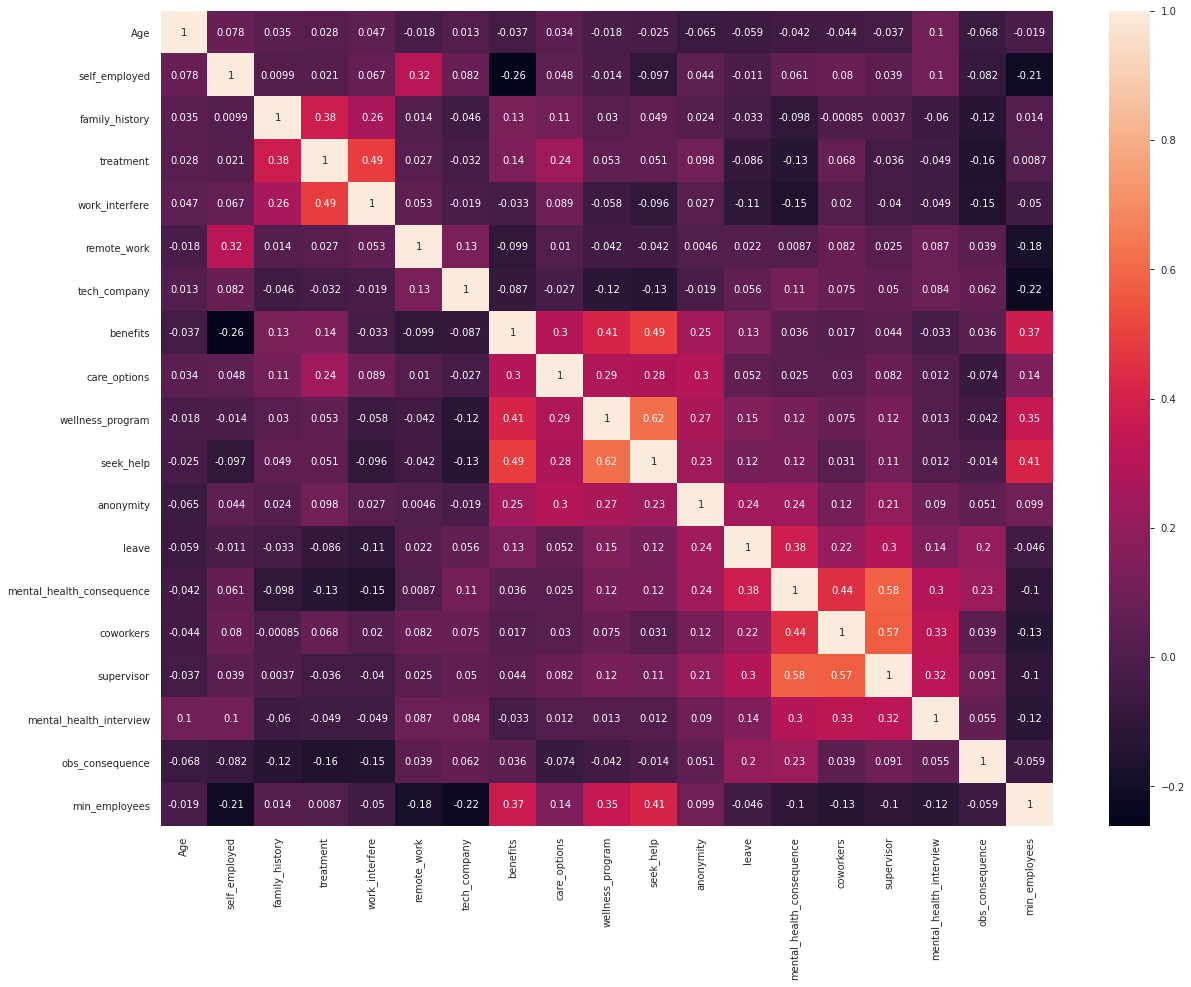

In [103]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot()
sns.heatmap(data=df.corr(), annot=True, ax=ax)

## Diferenças de tratamento de um problema de saúde mental em contrapartida com um de saúde fisica.

<h4>Conclusão</h4> 
Existe uma clara diferença em como o empregado enxerga um problema de saúde mental em relação a um problema de saúde fisica. Mais que o dobro dos entrevistados acreditem que existiria consequências caso eles revelasem problemas de saúde mental para o empregador ou em uma entrevista de emprego, em relação com os que não acreditam.

Text(0.5, 1.0, 'mental health consequence x phys healthconsequence')

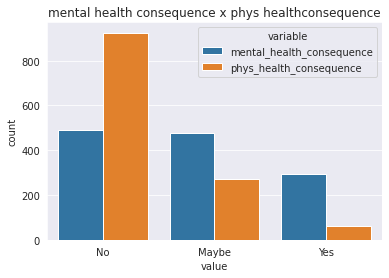

In [9]:
# mentalhealthconsequence x physhealthconsequence
df_ = pd.melt(df.get(["mental_health_consequence", "phys_health_consequence"]))
ax = sns.countplot(data=df_, x="value", hue="variable")
ax.set_title("mental health consequence x phys healthconsequence")

Text(0.5, 1.0, 'mental health interview x phys health interview')

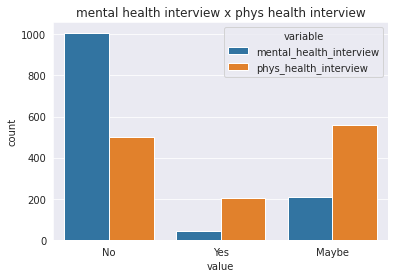

In [11]:
# mentalhealthinterview x physhealthinterview
df_ = pd.melt(df.get(["mental_health_interview", "phys_health_interview"]))
ax = sns.countplot(data=df_, x="value", hue="variable")
ax.set_title("mental health interview x phys health interview")

## Comparação entre o suporte para a saúde mental entre os países (EUA, Reino Unido, Alemanha e Canada)

<h4>Conclusão</h4>
Todos os países analizados aprensetam uma baixa pontuação para o suporte à saúde mental dando indicios do quanto esse assunto é pouco discutido. Com relação a este atributo os EUA possuem o melhor indice, seguido pelo Canada. Já na questão do pensamento de consequências negativas, os resultados mostram um equilibrio de pensamentos para os países (EUA, Canada e Reino Unido), apenas os empregados da alemanha tem um claro pensamento de que não existem consequencias negativas em reportar sobre seus problemas de saúde mental. Seguindo esse fator os empregados alemãs tão são os que estão mais dispostos a discutir sobre saúde mental.

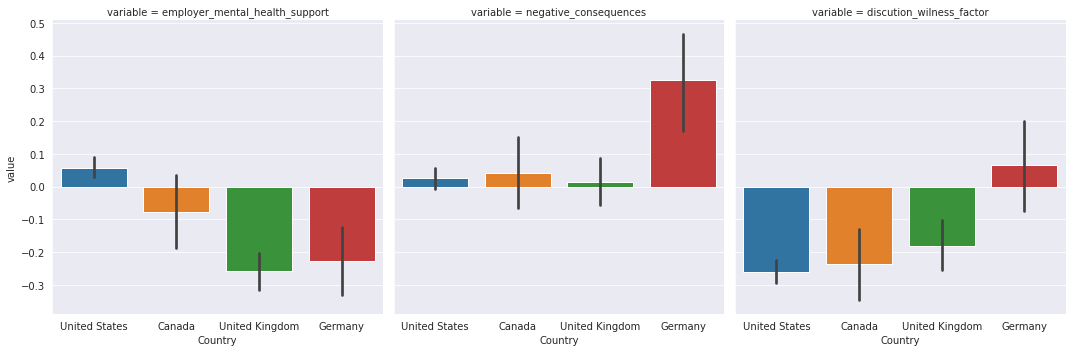

In [34]:
df_ = df[(df["Country"] == "United States") | (df["Country"] == "United Kingdom") | (df["Country"] == "Canada") | (df["Country"] == "Germany")]
df_ = df_.get(["Country", "employer_mental_health_support", "negative_consequences", "discution_wilness_factor"])
df_ = pd.melt(df_, id_vars=['Country'], value_vars=["employer_mental_health_support", "negative_consequences", "discution_wilness_factor"])
sns.catplot(data=df_, x="Country", y="value", col="variable", kind="bar")